# TP Large Scale Kernel Methods

### MDI341<br />
Xavier Bracquart - Sonia Bouden 02/03/2020

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_svmlight_file

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from time import time

from scipy.sparse.linalg import svds
from scipy.linalg import svd

from sklearn.metrics.pairwise import rbf_kernel, laplacian_kernel
import scipy

## Chargement et partitionnement des données

In [5]:
###############################################################################
# Requires file ijcnn1.dat.gz to be present in the directory

dataset_path = '../ijcnn1.dat'
ijcnn1 = load_svmlight_file(dataset_path)
X = ijcnn1[0].todense()
y = ijcnn1[1]

###############################################################################
# Extract features

X_train, X_test, y_train, y_test = train_test_split(X[:60000, :], y[:60000],
                     train_size=20000, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n1, p = X_train.shape
n2 = X_test.shape[0]

print("Nombre d'exemples d'apprentissage:", n1)
print("Nombre d'exemples de test:", n2)
print("Nombre de features:", p)

Nombre d'exemples d'apprentissage: 20000
Nombre d'exemples de test: 40000
Nombre de features: 22


## Question 1

On va fitter nos données d'apprentissage avec un SVM linéaire et un SVM non-linéaire (noyau Gaussien) pour comparer leur score de prédiction ainsi que le temps de calcul nécessaire à l'apprentissage et à la prédiction.

### SMV non linéaire (noyau Gaussien) - SVC

In [6]:
print("Fitting SVC rbf on %d samples..." % X_train.shape[0])
t0 = time()

clf = SVC(kernel='rbf', random_state=261)
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC rbf on %d samples..." % X_test.shape[0])
t1 = time()

y_pred = clf.predict(X_test)
accuracy_kernel = accuracy_score(y_test, y_pred)
print("done in %0.3fs" % (time() - t1))
timing_kernel = time() - t0
print("classification accuracy: %0.3f" % accuracy_kernel)

Fitting SVC rbf on 20000 samples...
done in 3.394s
Predicting with SVC rbf on 40000 samples...
done in 4.017s
classification accuracy: 0.980


### SVC linéaire

In [7]:
# TODO same for LinearSVC
print("Fitting LinearSVC on %d samples..." % X_train.shape[0])
t0 = time()
# TODO
clf = LinearSVC(dual=False, random_state=261)
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with LinearSVC on %d samples..." % X_test.shape[0])
t1 = time()
# TODO
y_pred = clf.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred)
print("done in %0.3fs" % (time() - t1))
timing_linear = time() - t0
print("classification accuracy: %0.3f" % accuracy_linear)

Fitting LinearSVC on 20000 samples...
done in 0.095s
Predicting with LinearSVC on 40000 samples...
done in 0.176s
classification accuracy: 0.917


Le modèle LinearSVC s'entraîne et prédit beaucoup plus rapidement que le modèle SVC. Par contre, en terme de précision, la classification est meilleure avec le modèle SVC que le modèle SVC linéaire.

## Question 2

On code une fonction qui calcule la meilleure approximation de rang $k$.

In [8]:
def rank_trunc(gram_mat, k, fast=True):
    """
    k-th order approximation of the Gram Matrix G.

    Parameters
    ----------
    gram_mat : array, shape (n_samples, n_samples)
        the Gram matrix
    k : int
        the order approximation
    fast : bool
        use svd (if False) or svds (if True).

    Return
    ------
    gram_mat_k : array, shape (n_samples, n_samples)
        The rank k Gram matrix.
    """
    if fast:
        print("calcul de la matrice complète (fast)")
        U, S, V = svds(gram_mat, k)
        gram_mat_k = U @ np.diag(S) @ V
    else:
        print("calcul avec la méthode lente")
        U, S, V = svd(gram_mat)
        gram_mat_k = U[:,:k] @ np.diag(S[:k]) @ V[:k]

    return gram_mat_k

## Question 3

On applique cette fonction sur la matrice décrite dans le sujet de TP.

In [9]:
p = 200
r_noise = 100
r_signal = 20

intensity = 50

rng = np.random.RandomState(42)
X_noise = rng.randn(r_noise, p)
X_signal = rng.randn(r_signal, p)

gram_signal = np.dot(X_noise.T, X_noise) + intensity * np.dot(X_signal.T, X_signal)
n_ranks = 100
ranks = np.arange(1, n_ranks + 1)
timing_fast = np.zeros(n_ranks)
timing_slow = np.zeros(n_ranks)
rel_error = np.zeros(n_ranks)

for k, rank in enumerate(ranks):
    print(k, rank)
    t0 = time()
    gram_mat_k = rank_trunc(gram_signal, rank, fast=True)
    timing_fast[k] = time() - t0

    t0 = time()
    gram_mat_k = rank_trunc(gram_signal, rank, fast=False)
    timing_slow[k] = time() - t0

    # TODO: compute relative error with Frobenius norm
    rel_error[k] = np.linalg.norm(gram_mat_k - gram_signal, 'fro') / np.linalg.norm(gram_signal, 'fro')

0 1
calcul de la matrice complète (fast)
calcul avec la méthode lente
1 2
calcul de la matrice complète (fast)
calcul avec la méthode lente
2 3
calcul de la matrice complète (fast)
calcul avec la méthode lente
3 4
calcul de la matrice complète (fast)
calcul avec la méthode lente
4 5
calcul de la matrice complète (fast)
calcul avec la méthode lente
5 6
calcul de la matrice complète (fast)
calcul avec la méthode lente
6 7
calcul de la matrice complète (fast)
calcul avec la méthode lente
7 8
calcul de la matrice complète (fast)
calcul avec la méthode lente
8 9
calcul de la matrice complète (fast)
calcul avec la méthode lente
9 10
calcul de la matrice complète (fast)
calcul avec la méthode lente
10 11
calcul de la matrice complète (fast)
calcul avec la méthode lente
11 12
calcul de la matrice complète (fast)
calcul avec la méthode lente
12 13
calcul de la matrice complète (fast)
calcul avec la méthode lente
13 14
calcul de la matrice complète (fast)
calcul avec la méthode lente
14 15
calcu

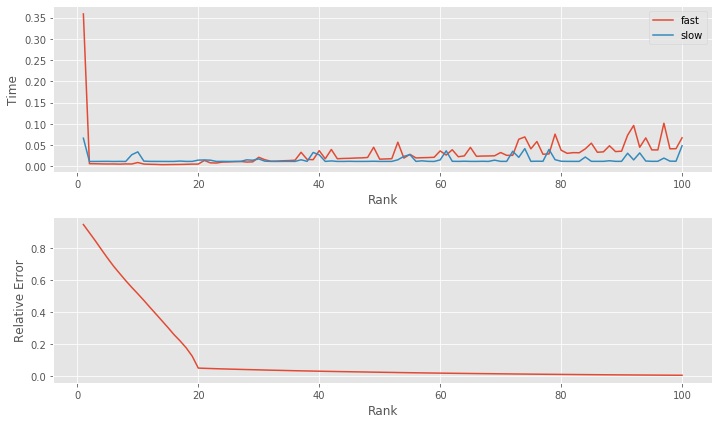

In [10]:
###############################################################################
# Display

f, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,6))
ax1, ax2 = axes.ravel()

ax1.plot(ranks, timing_fast, '-', label='fast')
ax1.plot(ranks, timing_slow, '-', label='slow')
ax1.legend()

ax1.set_xlabel('Rank')
ax1.set_ylabel('Time')
ax2.plot(ranks, rel_error, '-')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Relative Error')
plt.tight_layout()
plt.show()

On remarque que l'erreur relative diminue en augmentant le rang.

On remarque que la méthode dite lente devient plus efficace à partir du rang 30. Ceci s'explique par le fait que la méthode fast fait la décomposition svd complète, alors que la méthode svds tronque la matrice pour effectuer le même calcul. Plus le rang de la matrice augmente, plus la méthode tronquée (lente) devient plus efficace. Ceci nécessite de bien connaitre la matrice avec laquelle on travaille (par exemple si on sait que celle-ci contient des valeurs nulles... celle-ci peut s'avérer plus optimale).
Quand les données sont volumineuses, il est assez coûteux de calculer la matrice de Gram complète.
Quand la matrice est sparse, la svds est plus performante.

## Question 4

On va implémenter l'algorithme de Random Kernel Features pour le noyau Gaussien.

La technique dite des Random Kernel Features est d’approcher φ(xi) par c features aléatoires (c < +∞)
afin de pouvoir appliquer une méthode linéaire efficace tout en bénéficiant de l’amélioration possible du
score de prédiction grâce à la non-linéarité du noyau.

On prend un noyau gaussien (RBF). 

In [11]:
# Création des nouvelles matrices X_new_train et X_new_test 

def random_features(X_train, X_test, gamma, c=300, seed=44):
    """Compute random kernel features

    Parameters
    ----------
    X_train : array, shape (n_samples1, n_features)
        The train samples.
    X_test : array, shape (n_samples2, n_features)
        The test samples.
    gamma : float
        The Gaussian kernel parameter
    c : int
        The number of components
    seed : int
        The seed for random number generation

    Return
    ------
    X_new_train : array, shape (n_samples1, c)
        The new train samples.
    X_new_test : array, shape (n_samples2, c)
        The new test samples.
    """
    rng = np.random.RandomState(seed)
    
    # n_features = p
    # n_samples1 = n1 ou n2
    
    n_samples, n_features = X_train.shape
    
    
#     n_samples1, n_features = X_train.shape
#     n_samples2, n_features = X_test.shape
   
#     W = np.random.normal(0, np.sqrt(2*gamma), size = (n_features,c))
#     b = np.random.uniform(0, np.sqrt(2*np.pi), size = (1,c))
    
#     X_new_train = np.vstack([np.sqrt(2/c)*np.cos(X_train[i]@W+b) for i in range(n_samples1)])
#     X_new_test = np.vstack([np.sqrt(2/c)*np.cos(X_test[i]@W+b) for i in range(n_samples2)])
    
    W = rng.normal(0, np.sqrt(2*gamma), (X_train.shape[1],c))
    b = rng.uniform(0, np.sqrt(2*np.pi), (1,c))
    
    X_new_train = np.zeros((X_train.shape[0], c))
    for i in range(0, X_train.shape[0]):
        X_new_train[i] = np.sqrt(2/c) * np.cos(X_train[i] @ W + b)
        
    X_new_test = np.zeros((X_test.shape[0], c))
    for i in range(0, X_test.shape[0]):
        X_new_test[i] = np.sqrt(2/c)*np.cos(X_test[i] @ W + b)
    
    return X_new_train, X_new_test

## Question 5

On va maintenant appliquer cette méthode avec $c=300$.

In [12]:
n_samples, n_features = X_train.shape
n_samples_test, _ = X_test.shape
gamma = 1. / n_features

Z_train, Z_test = random_features(X_train, X_test, gamma, c=300, seed=44)

print("Fitting SVC linear on %d samples..." % n_samples)
t0 = time()
clf = LinearSVC(dual=False)
clf.fit(Z_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC linear on %d samples..." % n_samples_test)
t0 = time()
accuracy = clf.score(Z_test, y_test)
print("done in %0.3fs" % (time() - t0))
print("classification accuracy: %0.3f" % accuracy)

Fitting SVC linear on 20000 samples...
done in 1.453s
Predicting with SVC linear on 40000 samples...
done in 0.025s
classification accuracy: 0.962


L'entraînement du modèle est plus long qu'avec le SVM linéaire de départ (0.109s), mais plus rapide que le SVM non-linéaire (4.118s). Le temps de calcul pour la prédiction est pratiquement le même qu'avec le SVM linéaire.<br />
L'accuracy a bien augmenté par rapport au SVM linéaire de départ (0.917) et se rapproche de celle du SVM non-linéaire (0.98).

## Question 6

On implémente la méthode de Nystrom. L’approximation de Nyström est une alternative à la méthode précédente qui permet de calculer une approximation de la matrice de Gram en utilisant un sous-ensemble aléatoire de ses colonnes. Comme les Random Kernel Features, cette méthode permet aussi de calculer des features explicites et d’être ainsi combinée à une méthode linéaire.

In [13]:
def nystrom(X_train, X_test, gamma, c=500, k=200, seed=44, kernel=rbf_kernel):
    """Compute nystrom kernel approximation

    Parameters
    ----------
    X_train : array, shape (n_samples1, n_features)
        The train samples.
    X_test : array, shape (n_samples2, n_features)
        The test samples.
    gamma : float
        The Gaussian kernel parameter
    c : int
        The number of points to sample for the approximation
    k : int
        The number of components
    seed : int
        The seed for random number generation

    Return
    ------
    X_new_train : array, shape (n_samples1, c)
        The new train samples.
    X_new_test : array, shape (n_samples2, c)
        The new test samples.
    """
    rng = np.random.RandomState(seed)
    n_samples = X_train.shape[0]
    idx = rng.choice(n_samples, c)

    X_train_idx = X_train[idx, :]
    W = rbf_kernel(X_train_idx, X_train_idx, gamma=gamma)
    
    # TODO
    U, S, V = svd(W)
    Wk = U[:,:k] @ np.diag(S[:k]) @ V[:k,:]
    Mk = U[:,:k] @ scipy.linalg.fractional_matrix_power(np.diag(S[:k]), -0.5)
    
    C_train = kernel(X_train, X_train_idx, gamma=gamma)
    C_test = kernel(X_test, X_train_idx, gamma=gamma)
    
    X_new_train = C_train @ Mk
    X_new_test = C_test @ Mk
    
    return X_new_train, X_new_test

## Question 7

On va maintenant appliquer cette méthode également avec $c=500$ et $k=300$

In [14]:
Z_train, Z_test = nystrom(X_train, X_test, gamma, c=500, k=300, seed=44, kernel=rbf_kernel)

print("Fitting SVC linear on %d samples..." % n_samples)
t0 = time()
clf = LinearSVC(dual=False)
clf.fit(Z_train, y_train)
print("done in %0.3fs" % (time() - t0))

print("Predicting with SVC linear on %d samples..." % n_samples_test)
t0 = time()
accuracy = clf.score(Z_test, y_test)
print("done in %0.3fs" % (time() - t0))
print("classification accuracy: %0.3f" % accuracy)

Fitting SVC linear on 20000 samples...
done in 1.145s
Predicting with SVC linear on 40000 samples...
done in 0.026s
classification accuracy: 0.976


On constate que la méthode de Nystrom est plus efficace en temps de calcul ainsi qu'en score de précision.

## Question 8

On va maintenant réaliser une synthèse des performances des RKF et de Nystrom pour un ensemble de paramètres.

In [15]:
np.arange(20, 600, 50)

array([ 20,  70, 120, 170, 220, 270, 320, 370, 420, 470, 520, 570])

In [33]:
ranks = np.arange(20, 600, 50)
n_ranks = len(ranks)
timing_rkf = np.zeros(n_ranks)
timing_nystrom = np.zeros(n_ranks)

accuracy_nystrom = np.zeros(n_ranks)
accuracy_rkf = np.zeros(n_ranks)

print("Training SVMs for various values of c...")

for i, c in enumerate(ranks):
    # Nystrom
    Z_train_nystrom, Z_test_nystrom = nystrom(X_train, X_test, gamma, c=c, k=c-10, seed=44)
    t0 = time()
    clf = LinearSVC(dual=False)
    clf.fit(Z_train_nystrom, y_train)
    timing_nystrom[i] = time() - t0
    accuracy_nystrom[i] = clf.score(Z_test_nystrom, y_test)
    
    #RKF
    Z_train, Z_test = random_features(X_train, X_test, gamma, c=c, seed=44)
    t0 = time()
    clf = LinearSVC(dual=False)
    clf.fit(Z_train, y_train)
    timing_rkf[i] = time() - t0
    accuracy_rkf[i] = clf.score(Z_test, y_test)

print("done")

Training SVMs for various values of c...
done


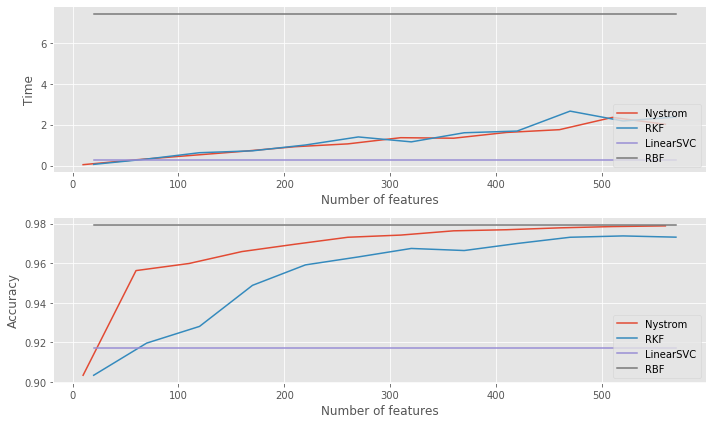

In [17]:
###############################################################################
# Display bis

f, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,6))
ax1, ax2 = axes.ravel()

ax1.plot(ranks-10, timing_nystrom, '-', label='Nystrom')
ax1.plot(ranks, timing_rkf, '-', label='RKF')
ax1.plot(ranks, timing_linear * np.ones(n_ranks), '-', label='LinearSVC')
ax1.plot(ranks, timing_kernel * np.ones(n_ranks), '-', label='RBF')

ax1.set_xlabel('Number of features')
ax1.set_ylabel('Time')
ax1.legend(loc='lower right')

ax2.plot(ranks-10, accuracy_nystrom, '-', label='Nystrom')
ax2.plot(ranks, accuracy_rkf, '-', label='RKF')
ax2.plot(ranks, accuracy_linear * np.ones(n_ranks), '-', label='LinearSVC')
ax2.plot(ranks, accuracy_kernel * np.ones(n_ranks), '-', label='RBF')
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

En augmentant le nombre de features, on remarque une convergence en terme de score de précision pour les méthodes Nystrom et RBF. RKF a une précision moindre.
Le temps de calcul est quasiment identique pour Nystrom et RKF jusqu'à un certain nombre de features.

## Pour aller plus loin

### Kernel Laplacien

On adapte la méthodologie sur le noyau de Laplace, en utilisant la fonction *sklearn.metrics.pairwise.laplacian_kernel* pour calculer les valeurs de noyau:

In [38]:
def laplacian(X_train, X_test, gamma, c=500, k=200, seed=44, kernel=laplacian_kernel):
    rng = np.random.RandomState(seed)
    n_samples = X_train.shape[0]
    idx = rng.choice(n_samples, c)

    X_train_idx = X_train[idx, :]
    W = rbf_kernel(X_train_idx, X_train_idx, gamma=gamma)
    
    # TODO
    U, S, V = svd(W)
    Wk = U[:,:k] @ np.diag(S[:k]) @ V[:k,:]
    Mk = U[:,:k] @ scipy.linalg.fractional_matrix_power(np.diag(S[:k]), -0.5)
    
    C_train = kernel(X_train, X_train_idx, gamma=gamma)
    C_test = kernel(X_test, X_train_idx, gamma=gamma)
    
    X_new_train = C_train @ Mk
    X_new_test = C_test @ Mk
    
    return X_new_train, X_new_test

In [39]:
Z_train_laplacian, Z_test_laplacian = laplacian(X_train, X_test, gamma, c=500, k=300, seed=44, kernel=laplacian_kernel)

# print("Fitting SVC linear on %d samples..." % n_samples)
# t0 = time()
# clf = LinearSVC(dual=False)
# clf.fit(Z_train, y_train)
# print("done in %0.3fs" % (time() - t0))

# print("Predicting with SVC linear on %d samples..." % n_samples_test)
# t0 = time()
# accuracy = clf.score(Z_test, y_test)
# print("done in %0.3fs" % (time() - t0))
# print("classification accuracy: %0.3f" % accuracy)

timing_laplacian = np.zeros(n_ranks)
accuracy_laplacian = np.zeros(n_ranks)

for i, c in enumerate(ranks):
    # laplacian_kernel
    t0 = time()
    clf = LinearSVC(dual=False)
    clf.fit(Z_train_laplacian, y_train)
    timing_laplacian[i] = time() - t0
    accuracy_laplacian[i] = clf.score(Z_test_laplacian, y_test)
# print(timing_laplacian)
# print(accuracy_laplacian)

Le résultat est légèrement inférieur à celui obtenu avec le noyau Gaussien (0.976), mais toujours meilleur que le SVM linéaire.

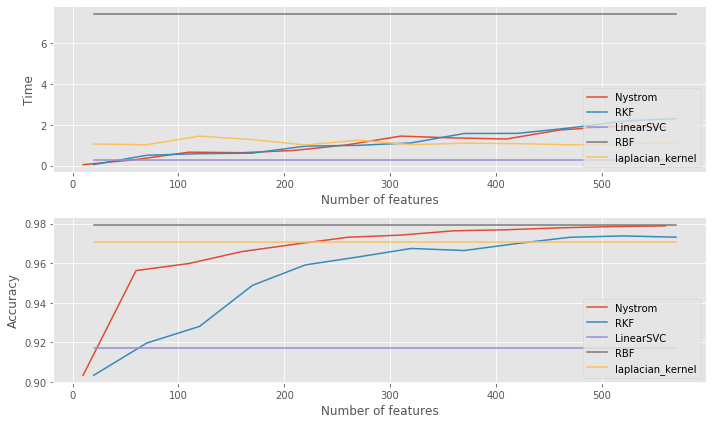

In [40]:
###############################################################################
# Display kernel laplacian

f, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,6))
ax1, ax2 = axes.ravel()

ax1.plot(ranks-10, timing_nystrom, '-', label='Nystrom')
ax1.plot(ranks, timing_rkf, '-', label='RKF')
ax1.plot(ranks, timing_linear * np.ones(n_ranks), '-', label='LinearSVC')
ax1.plot(ranks, timing_kernel * np.ones(n_ranks), '-', label='RBF')
ax1.plot(ranks, timing_laplacian * np.ones(n_ranks), '-', label='laplacian_kernel')

ax1.set_xlabel('Number of features')
ax1.set_ylabel('Time')
ax1.legend(loc='lower right')

ax2.plot(ranks-10, accuracy_nystrom, '-', label='Nystrom')
ax2.plot(ranks, accuracy_rkf, '-', label='RKF')
ax2.plot(ranks, accuracy_linear * np.ones(n_ranks), '-', label='LinearSVC')
ax2.plot(ranks, accuracy_kernel * np.ones(n_ranks), '-', label='RBF')
ax2.plot(ranks, accuracy_laplacian * np.ones(n_ranks), '-', label='laplacian_kernel')

ax2.set_xlabel('Number of features')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
plt.tight_layout()
plt.show()

# je ne comprends pas pourquoi le laplacien est horizontal ! si vous trouvez je suis preneuse !! l'autre poiint sur le plot : pour le nystrom on ne multiplie pas par * np.ones(n_ranks) alors que les autres timing oui  et on fait ranks -10 et pas pour les autres O.o

### Combiner les features obtenus avec différents noyaux

In [45]:
train_concat = np.concatenate((Z_train_laplacian[:,:150],Z_train_nystrom[:,:150]), axis=1)
test_concat = np.concatenate((Z_test_laplacian[:,:150],Z_test_nystrom[:,:150]), axis=1)

http://www.cs.columbia.edu/~dplewis/research/thesis/slides.pdf    slide 8/59

In [46]:
Z_train_laplacian_concat, Z_test_laplacian_concat = laplacian(X_train, X_test, gamma, c=500, k=300, seed=44, kernel=laplacian_kernel)


timing_laplacian_concat = np.zeros(n_ranks)
accuracy_laplacian_concat = np.zeros(n_ranks)

for i, c in enumerate(ranks//2):
    # laplacian_kernel
    t0 = time()
    clf = LinearSVC(dual=False)
    clf.fit(Z_train_laplacian_concat, y_train)
    timing_laplacian_concat[i] = time() - t0
    accuracy_laplacian_concat[i] = clf.score(Z_test_laplacian_concat, y_test)
    
    # Nystrom laplace
    Z_train_nystrom, Z_test_nystrom = nystrom(X_train, X_test, gamma, c=c, k=c-10, seed=44)
    t0 = time()
    clf = LinearSVC(dual=False)
    clf.fit(Z_train_nystrom, y_train)
    timing_nystrom[i] = time() - t0
    accuracy_nystrom[i] = clf.score(Z_test_nystrom, y_test)
